In [20]:
import os

import google.oauth2.credentials

import google_auth_oauthlib.flow
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from google_auth_oauthlib.flow import InstalledAppFlow
import pandas as pd
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
import seaborn as sns


# The CLIENT_SECRETS_FILE variable specifies the name of a file that contains
# the OAuth 2.0 information for this application, including its client_id and
# client_secret.
CLIENT_SECRETS_FILE = "client_secret.json"

# This OAuth 2.0 access scope allows for full read/write access to the
# authenticated user's account and requires requests to use an SSL connection.
SCOPES = ['https://www.googleapis.com/auth/youtube.force-ssl']
API_SERVICE_NAME = 'youtube'
API_VERSION = 'v3'

def get_authenticated_service():
  flow = InstalledAppFlow.from_client_secrets_file(CLIENT_SECRETS_FILE, SCOPES)
  credentials = flow.run_console()
  return build(API_SERVICE_NAME, API_VERSION, credentials = credentials)

def print_response(response):
   print(response)
   #print(response, file=open("output.txt", "a"))
   #file = open(response, "a")
   #file.write(output)
   #file.close()


    # Build a resource based on a list of properties given as key-value pairs.
    # Leave properties with empty values out of the inserted resource.


def build_resource(properties):
    resource = {}
    for p in properties:
        # Given a key like "snippet.title", split into "snippet" and "title", where
        # "snippet" will be an object and "title" will be a property in that object.
        prop_array = p.split('.')
        ref = resource
        for pa in range(0, len(prop_array)):
            is_array = False
            key = prop_array[pa]

            # For properties that have array values, convert a name like
            # "snippet.tags[]" to snippet.tags, and set a flag to handle
            # the value as an array.
            if key[-2:] == '[]':
                key = key[0:len(key) - 2:]
                is_array = True

            if pa == (len(prop_array) - 1):
                # Leave properties without values out of inserted resource.
                if properties[p]:
                    if is_array:
                        ref[key] = properties[p].split(',')
                    else:
                        ref[key] = properties[p]
                elif key not in ref:
                    # For example, the property is "snippet.title", but the resource does
                    # not yet have a "snippet" object. Create the snippet object here.
                    # Setting "ref = ref[key]" means that in the next time through the
                    # "for pa in range ..." loop, we will be setting a property in the
                    # resource's "snippet" object.
                    ref[key] = {}
                    ref = ref[key]
                else:
                    # For example, the property is "snippet.description", and the resource
                    # already has a "snippet" object.
                    ref = ref[key]
            return resource

# Remove keyword arguments that are not set
def remove_empty_kwargs(**kwargs):
  good_kwargs = {}
  if kwargs is not None:
    for key, value in kwargs.items():
      if value:
        good_kwargs[key] = value
  return good_kwargs

def search_list_by_keyword(client, **kwargs):
  # See full sample for function
  kwargs = remove_empty_kwargs(**kwargs)
  df = pd.DataFrame()
  response = client.search().list(
    **kwargs
  ).execute()

  json_string = json.dumps(response)
  json_data = json.loads(json_string)
  global next_token
  next_token = json_data['nextPageToken']
  print(json_data['items'])
  for i in json_data['items']:
      video_list.append(i['id']['videoId'])

  #print(video_list)



def videos_list_multiple_ids(client, **kwargs):
  # See full sample for function
  kwargs = remove_empty_kwargs(**kwargs)

  response = client.videos().list(
    **kwargs
  ).execute()

  json_string = json.dumps(response)
  json_data = json.loads(json_string)
  df_items = pd.DataFrame()
   
  df = pd.DataFrame.from_dict(json_normalize(json_data['items']), orient='columns')
  df.to_csv('mars50.csv')



if __name__ == '__main__':
    # When running locally, disable OAuthlib's HTTPs verification. When
    # running in production *do not* leave this option enabled.
    os.environ['OAUTHLIB_INSECURE_TRANSPORT'] = '1'
    client = get_authenticated_service()

video_list = []

search_list_by_keyword(client,
                           part='snippet',
                           maxResults=50,
                           q='mars',
                           type='video')

video_string = ','.join(video_list)
#print(video_string)
videos_list_multiple_ids(client,
                         part='snippet,contentDetails,statistics',
                         id=video_string)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=405132311255-j3q4bglklqg6mn7j7jufjkpv92ss2k33.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.force-ssl&state=Xe2EoLN0EJftyokoZNGhr2OIiuS5YV&prompt=consent&access_type=offline
Enter the authorization code: 4/qADYjMZp9m2ZFF6Br7bcgt7r0ECu_jw-RZmZFjyOCSBB4g8nTMP755E
[{'kind': 'youtube#searchResult', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/6VFtm1iXdAe8Hru134IUPdGvmws"', 'id': {'kind': 'youtube#video', 'videoId': '_F4Y4NOQJHk'}, 'snippet': {'publishedAt': '2018-11-30T21:10:22.000Z', 'channelId': 'UCLA_DiR1FfKNvjuUpBHmylQ', 'title': 'InSight Mission Lands Safely on Mars on This Week @NASA – November 30, 2018', 'description': "Our InSight mission arrives at Mars, announcing the companies that will help us get to the Moon, and the space station's next crew wraps up prelaunch activities ...",

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


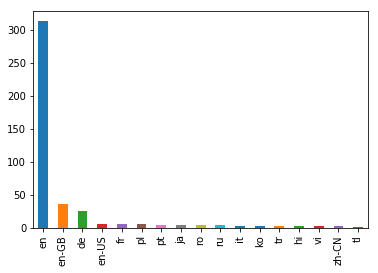

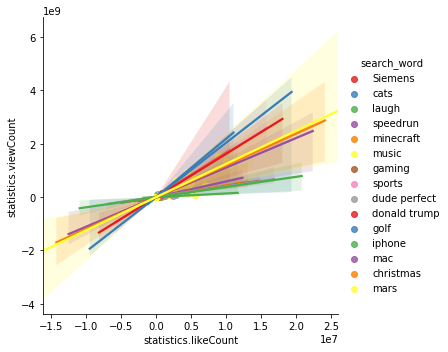

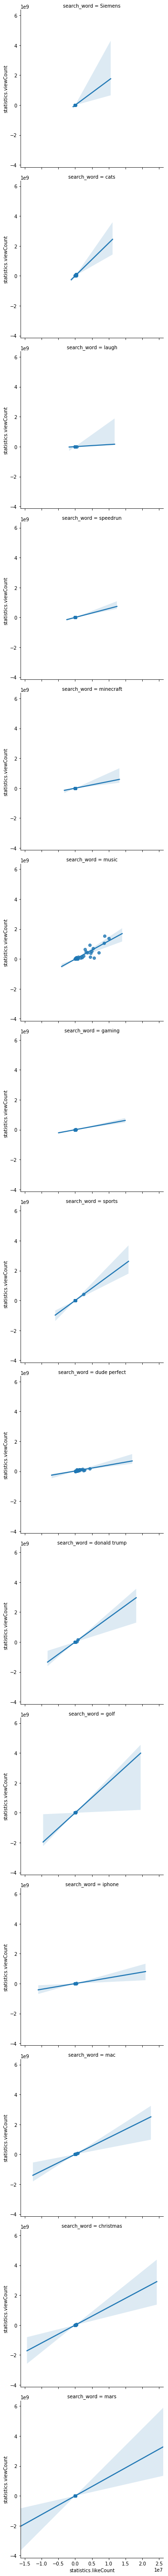

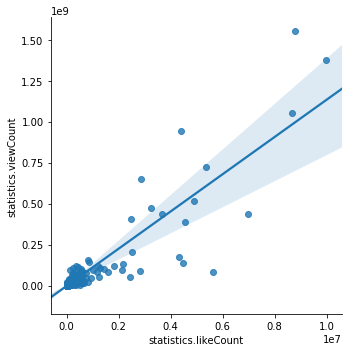

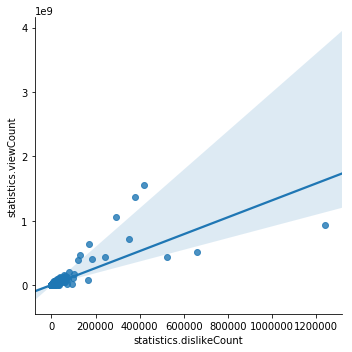

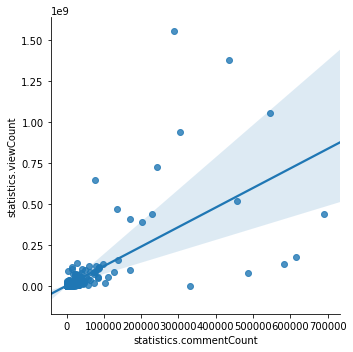

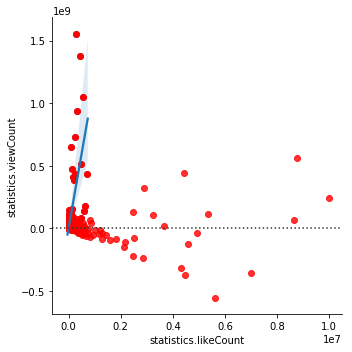

In [40]:
df = pd.read_csv('youtube750.csv')
df.columns
df.head(5)

df['snippet.defaultAudioLanguage'].value_counts().plot(kind='bar')
df['snippet.defaultLanguage'].value_counts().plot(kind='bar')

sns.lmplot(x='statistics.likeCount', y='statistics.viewCount', data=df, hue='search_word', palette='Set1')
sns.lmplot(x='statistics.likeCount', y='statistics.viewCount', data=df, row='search_word')
# df['length_tags'] = [(df['snippet.tags'] for df['snippet.tags'] in df)]
# print(df['length_tags'])
# df.plot.scatter(x='statistics.likeCount', y='statistics.viewCount')
# df.plot.scatter(x='statistics.dislikeCount', y='statistics.viewCount')
# df.plot.scatter(x='statistics.commentCount', y='statistics.viewCount')
sns.lmplot(x='statistics.likeCount', y='statistics.viewCount', data=df)
sns.lmplot(x='statistics.dislikeCount', y='statistics.viewCount', data=df)
sns.lmplot(x='statistics.commentCount', y='statistics.viewCount', data=df)

sns.lmplot(x='statistics.commentCount', y='statistics.viewCount', data=df)
#Like count is the best indicator apparently

sns.residplot(x='statistics.likeCount', y='statistics.viewCount', data=df, color='red')

plt.scatter(df['statistics.commentCount'], df['statistics.viewCount'], label='data', color='red', marker='o')

#df.boxplot(column = ['statistics.likeCount', 'statistics.dislikeCount', 'statistics.commentCount'])